**Importing Packages**

In [1]:
from pytrends.request import TrendReq
import pandas as pd
import numpy as np 
import lxml
import requests
import pandas_datareader.data as web 
import json 
from bs4 import BeautifulSoup
import scrapy
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from PIL import ImageFilter
from datetime import datetime
import re
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import statsmodels.api as sm
import plotly as py

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\thoma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thoma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Importing Data**

In [3]:
stats = pd.read_csv('Stats.csv')

In [4]:
stats.head()

,Player,S/C,Pos,GP,G,A,P,+/-,PIM,P/GP,...,PPG,PPP,SHG,SHP,OTG,GWG,S,S%,TOI/GP,FOW%
0,Connor McDavid,L,C,360,216,378,594,68,149,1.65,...,60,228,5,10,11,46,"1,318",16.4,22:17,50.2
1,Leon Draisaitl,L,C,369,231,306,537,48,156,1.46,...,103,208,6,7,7,45,"1,142",20.2,22:18,53.3
2,Nathan MacKinnon,R,C,335,170,286,456,106,155,1.36,...,51,154,0,0,6,26,"1,554",10.9,21:31,44.6
3,Artemi Panarin,R,L,347,128,300,428,89,103,1.23,...,32,133,0,0,6,22,887,14.4,19:47,30
4,Mitchell Marner,R,R,348,127,297,424,90,102,1.22,...,24,120,8,15,4,21,963,13.2,21:05,43.8


# Expressing Quantity of Young Talent

**Data Exploration, Manipulation, Cleaning, & Handling**

In [5]:
df1 = pd.read_excel('Stats_1.xlsx')    # loading first half of the data 

In [6]:
df2 = pd.read_excel('Stats_2.xlsx')    # loading second half of the data 

In [7]:
player_stats = pd.concat([df1, df2])   # Combining both datasets into one 

In [8]:
player_stats.to_excel('merged_file.xlsx', index = False)    # Merging the data 

In [9]:
player_stats.head()    # Displaying new combined dataframe 

,Rk,Name,Born,Pos,GP,G,A,P,PIM,+/-,...,G/GP,A/GP,P/GP,SHOTS,SH%,HITS,BS,FOW,FOL,FO%
0,1,Connor McDavid,1997,F,360,216,378,594,149,68,...,0.600,1.050,1.650,1318,16.4%,301,138,2151,2131,50.23%
1,2,Leon Draisaitl,1995,F,369,231,306,537,156,48,...,0.626,0.829,1.455,1142,20.2%,240,122,3606,3166,53.25%
2,3,Nathan MacKinnon,1995,F,335,170,286,456,155,106,...,0.507,0.854,1.361,1554,10.9%,264,156,2020,2508,44.61%
3,4,Artemi Panarin,1991,F,347,128,300,428,103,89,...,0.369,0.865,1.233,887,14.4%,100,67,9,21,30.00%
4,5,Mitchell Marner,1997,F,348,127,297,424,102,90,...,0.365,0.853,1.218,963,13.2%,204,197,28,36,43.75%


In [10]:
player_stats.drop(columns = ['PIM', 'ES', 'PP', 'SH', 'PPP%', 'SH%', 'FOW', 'FOL', 'FO%',
                            'ESG/60', 'ESA/60', 'ESP/60', 'PPG/60', 'PPA/60', 'PPP/60',
                            'HITS', 'BS', 'G/60', 'A/60', 'P/60', 'SHP', 'SHG', 'SHA',
                            'G/GP', 'A/GP', 'Pos', 'ESA', 'PPA', 'GWA', 'OTA'], inplace = True)   # Dropping columns 

In [11]:
player_stats.head()

,Rk,Name,Born,GP,G,A,P,+/-,TOI,ESG,PPG,GWG,OTG,ESP,PPP,GWP,OTP,P/GP,SHOTS
0,1,Connor McDavid,1997,360,216,378,594,68,22:17,151,60,46,11,356,228,103,20,1.650,1318
1,2,Leon Draisaitl,1995,369,231,306,537,48,22:17,122,103,45,7,322,208,104,19,1.455,1142
2,3,Nathan MacKinnon,1995,335,170,286,456,106,21:31,119,51,26,6,302,154,91,12,1.361,1554
3,4,Artemi Panarin,1991,347,128,300,428,89,19:46,96,32,22,6,295,133,82,18,1.233,887
4,5,Mitchell Marner,1997,348,127,297,424,90,21:04,95,24,21,4,289,120,78,12,1.218,963


In [12]:
player_stats['Age'] = 2023 - player_stats['Born']     # Creating new column to show players age

In [13]:
player_stats.head()

,Rk,Name,Born,GP,G,A,P,+/-,TOI,ESG,PPG,GWG,OTG,ESP,PPP,GWP,OTP,P/GP,SHOTS,Age
0,1,Connor McDavid,1997,360,216,378,594,68,22:17,151,60,46,11,356,228,103,20,1.650,1318,26
1,2,Leon Draisaitl,1995,369,231,306,537,48,22:17,122,103,45,7,322,208,104,19,1.455,1142,28
2,3,Nathan MacKinnon,1995,335,170,286,456,106,21:31,119,51,26,6,302,154,91,12,1.361,1554,28
3,4,Artemi Panarin,1991,347,128,300,428,89,19:46,96,32,22,6,295,133,82,18,1.233,887,32
4,5,Mitchell Marner,1997,348,127,297,424,90,21:04,95,24,21,4,289,120,78,12,1.218,963,26


In [14]:
player_stats['Prime'] = player_stats['Age'].apply(lambda x: 'yes' if x <= 28 else 'no')   # New column for career stage

In [15]:
player_stats.head()

,Rk,Name,Born,GP,G,A,P,+/-,TOI,ESG,...,GWG,OTG,ESP,PPP,GWP,OTP,P/GP,SHOTS,Age,Prime
0,1,Connor McDavid,1997,360,216,378,594,68,22:17,151,...,46,11,356,228,103,20,1.650,1318,26,yes
1,2,Leon Draisaitl,1995,369,231,306,537,48,22:17,122,...,45,7,322,208,104,19,1.455,1142,28,yes
2,3,Nathan MacKinnon,1995,335,170,286,456,106,21:31,119,...,26,6,302,154,91,12,1.361,1554,28,yes
3,4,Artemi Panarin,1991,347,128,300,428,89,19:46,96,...,22,6,295,133,82,18,1.233,887,32,no
4,5,Mitchell Marner,1997,348,127,297,424,90,21:04,95,...,21,4,289,120,78,12,1.218,963,26,yes


In [25]:
prime_count = player_stats['Prime'].value_counts(normalize=True) * 100
print(prime_count)                      # Getting a count of how many players in the top 100 fit the prime criteria

no     59.0
yes    41.0
Name: Prime, dtype: float64


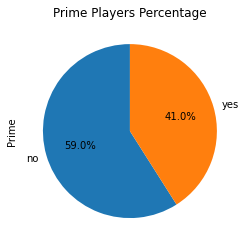

In [26]:
prime_count.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Prime Players Percentage')
plt.show()           # Chart to visualize the above percentage of prime players 

In [28]:
player_stats.groupby('Age')['Rk'].agg(['mean', 'std'])     # Grouping data by age and overall rank

,mean,std
Age,,
23,79.000000,25.455844
24,80.750000,20.238165
25,68.000000,20.712315
26,35.500000,31.588500
27,41.181818,26.502144
28,35.428571,30.983098
29,53.600000,25.540164
30,36.000000,32.090151
31,77.375000,18.345396


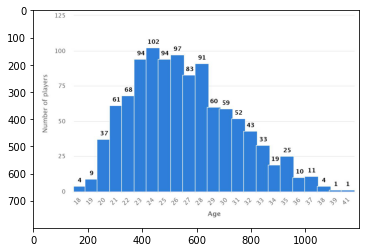

In [29]:
# Open JPEG file
Player_Age_Breakdown = Image.open("chart.jpeg")

# Display JPEG image
Player_Age_Breakdown.show()

plt.imshow(Player_Age_Breakdown)       # Importing a chart that shows the number of players in the NHL by age 

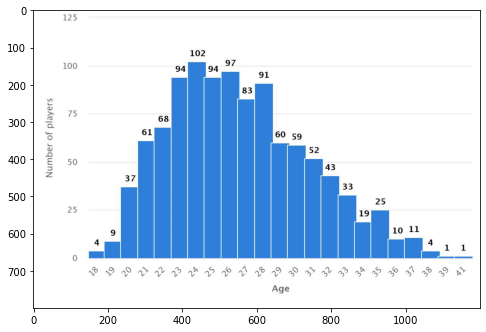

In [30]:
Player_Age_Breakdown = Image.open("chart.jpeg")

fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(Player_Age_Breakdown)
plt.show()                        # Enlarging the above image to make it easier to read 

In [33]:
prime_players = player_stats.loc[player_stats['Prime'] == 'yes', 'Name']
print(prime_players)        # Showing the names of all the players that are in their prime 

0        Connor McDavid
1        Leon Draisaitl
2      Nathan MacKinnon
4       Mitchell Marner
5        David Pastrnak
6       Auston Matthews
12      Matthew Tkachuk
13       Mikko Rantanen
16    Aleksander Barkov
19          Kyle Connor
21        Brayden Point
22        Sebastian Aho
28     Elias Pettersson
29       Alex DeBrincat
35         Sam Reinhart
38         Dylan Larkin
39     William Nylander
40          Kevin Fiala
42           Timo Meier
48        Mathew Barzal
49            Bo Horvat
0         Brady Tkachuk
1      Pavel Buchnevich
2        Clayton Keller
7           Jack Eichel
10    Andrei Svechnikov
14       Travis Konecny
18    Pierre-Luc Dubois
21         Brock Boeser
24           Cale Makar
26         Patrik Laine
27          Roope Hintz
33         Jesper Bratt
34         Quinn Hughes
37             Max Domi
38             Adam Fox
39      Kirill Kaprizov
41       Nikolaj Ehlers
42      Jason Robertson
43        Nico Hischier
46        Rasmus Dahlin
Name: Name, dtyp

In [37]:
# New column for players between the age of 23 and 30 
player_stats['Extended Prime'] = player_stats['Age'].apply(lambda x: 'yes' if x >= 23 and x <= 30 else 'no')

In [38]:
extended_prime_count = player_stats['Extended Prime'].value_counts(normalize=True) * 100
print(extended_prime_count)      # Showing the percentage of players that fit into this category 

yes    56.0
no     44.0
Name: Extended Prime, dtype: float64


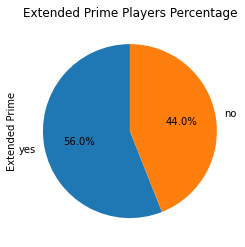

In [39]:
extended_prime_count.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Extended Prime Players Percentage')
plt.show()           # Chart that visualizes the above percentages 

# Google Trends Comparative Analysis

**Google Trends & Data Visualization** 

In [40]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl = 'en-US', tz = 360)    # setting up for google trend imports 

In [61]:
kw_list = ['NHL', 'NFL', 'MLB', 'NBA']
pytrends.build_payload(kw_list, cat = 0, timeframe = 'today 5-y', geo = '')    # web search history for 4 pro sports leagues

<AxesSubplot:xlabel='date'>

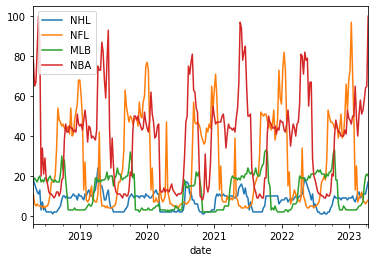

In [62]:
iot = pytrends.interest_over_time()
iot.plot()       # chart displaying the web search frequency for all pro leagues over a 5 year span 

In [63]:
pytrends.interest_over_time()    # Dataframe for the above chart 

,NHL,NFL,MLB,NBA,isPartial
date,,,,,
2018-04-29,18,11,18,78,False
2018-05-06,16,6,19,65,False
2018-05-13,14,5,18,67,False
2018-05-20,12,6,17,84,False
2018-05-27,11,5,19,100,False
...,...,...,...,...,...
2023-03-19,11,8,7,53,False
2023-03-26,11,7,15,58,False
2023-04-02,11,6,20,64,False


In [64]:
kw_list2 = ['NHL']
pytrends.build_payload(kw_list2, cat = 0, timeframe = 'today 5-y', geo = '')   # isolating web search frequency for the NHL 

<AxesSubplot:xlabel='date'>

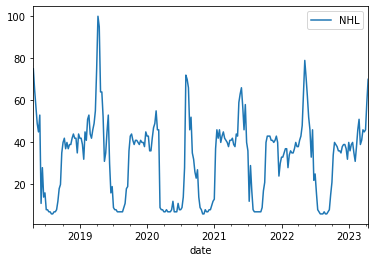

In [65]:
iot = pytrends.interest_over_time()
iot.plot()      # chart for the NHL isolation 

In [66]:
pytrends.interest_over_time()    # Dataframe for NHL isolation 

,NHL,isPartial
date,,
2018-04-29,75,False
2018-05-06,65,False
2018-05-13,57,False
2018-05-20,49,False
2018-05-27,45,False
...,...,...
2023-03-19,46,False
2023-03-26,45,False
2023-04-02,46,False


In [47]:
kw_list3 = ['Nathan Mackinnon', 'Auston Matthews', 'Jason Robertson', 'Connor McDavid', 'Jack Hughes']
pytrends.build_payload(kw_list3, cat = 0, timeframe = 'today 5-y', geo = '')   # search for popular player web traffic 

<AxesSubplot:xlabel='date'>

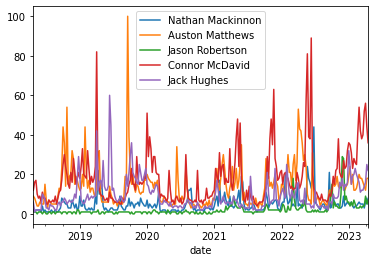

In [48]:
iot = pytrends.interest_over_time()
iot.plot()      # Chart for popular NHL player web traffic 

In [49]:
kw_list4 = ['Patrick Mahomes', 'Saquon Barkley', 'Pete Alonso', 'Jacob deGrom']
pytrends.build_payload(kw_list4, cat = 0, timeframe = 'today 5-y', geo = '') # Popular players search from other pro leagues

<AxesSubplot:xlabel='date'>

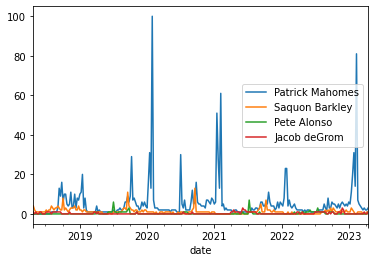

In [50]:
iot = pytrends.interest_over_time()
iot.plot()     # Chart displaying web search frequency for popular players from the NFL and MLB 

In [51]:
kw_list5 = ['ESPN', 'Hulu', 'TNT', 'TBS', 'ABC']
pytrends.build_payload(kw_list5, cat = 0, timeframe = 'today 5-y', geo = '')   # Search for traffic on the tv networks

<AxesSubplot:xlabel='date'>

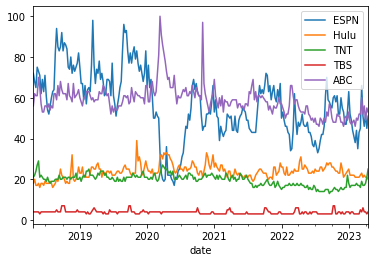

In [52]:
iot = pytrends.interest_over_time()
iot.plot()      # Chart displaying the network web search histroy for the past 5 years 

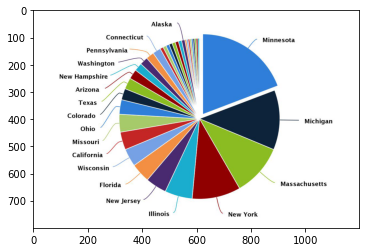

In [54]:
Player_State_Breakdown = Image.open("chart (1).jpeg")

Player_State_Breakdown.show()

plt.imshow(Player_State_Breakdown)   # Displaying chart that shows breakdown of NHL players by state

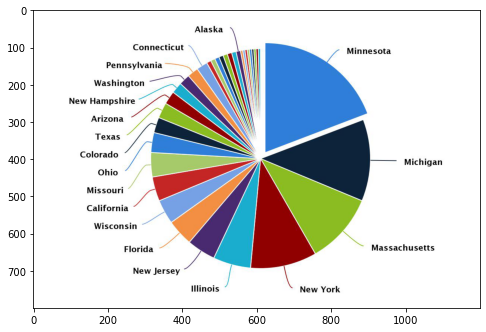

In [55]:
Player_State_Breakdown = Image.open("chart (1).jpeg")

fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(Player_State_Breakdown)
plt.show()          # Enlarging the above image for clarity 

In [56]:
from IPython.display import display    # importing package for PNG file imports 

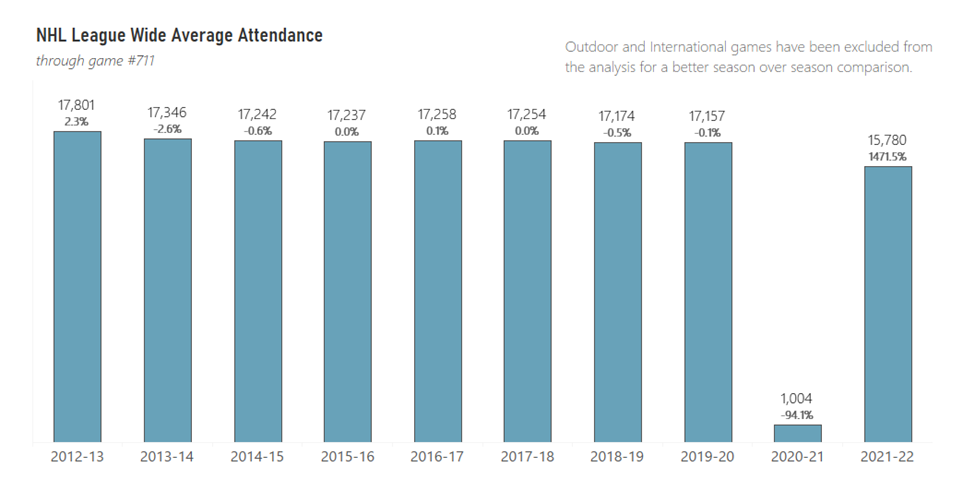

In [67]:
NHL_attendance = Image.open('NHL_attendance.png')

NHL_attendance.show()
display(NHL_attendance)    # Graph showing NHL Average attendance numbers for the past decade (10 years)

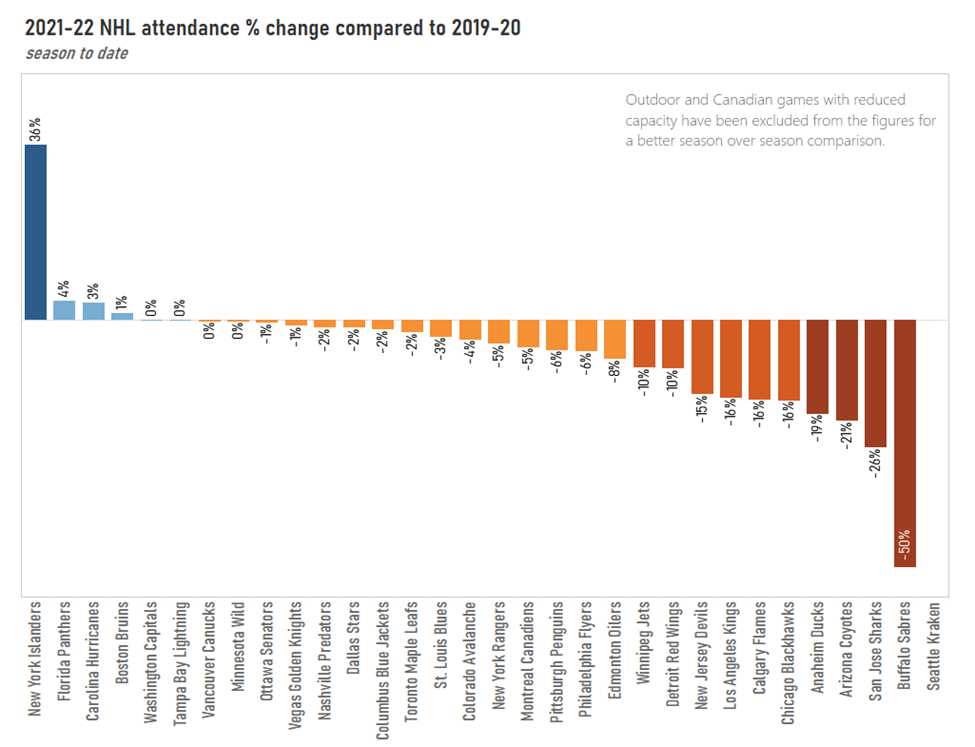

In [68]:
NHL_attendance_change = Image.open('NHL_attendance_change.png')

NHL_attendance_change.show()
display(NHL_attendance_change)    # Graph displaying the attendance change for each franchise between 2019-2022

In [69]:
google_trend_state_breakdown = pd.read_csv('geoMap.csv')    # importing dataframe from google trends 

In [70]:
google_trend_state_breakdown    # Displaying the data showing popularity of elite teams by state 

,,,,Category: All categories
Region,New York Rangers: (4/23/18 - 4/23/23),Minnesota Wild: (4/23/18 - 4/23/23),Vegas Golden Knights: (4/23/18 - 4/23/23),Tampa Bay Lightning: (4/23/18 - 4/23/23)
Nevada,1%,2%,95%,2%
Minnesota,1%,94%,3%,2%
North Dakota,2%,85%,8%,5%
Florida,6%,2%,2%,90%
South Dakota,3%,82%,9%,6%
New York,73%,4%,8%,15%
New Jersey,75%,4%,7%,14%
Connecticut,71%,5%,8%,16%
Wisconsin,6%,70%,11%,13%


In [18]:
site = 'https://records.nhl.com/history/attendance'
r = requests.get(site)
soup = BeautifulSoup(r.text, 'html.parser')

print(soup)     # Attempt to scrape table from the official NHL website (not compatable)

<!DOCTYPE html>

<html>
<head>
<link href="https://assets.nhle.com/nhl/images/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-80428426-8"></script>
<script>
            window.dataLayer = window.dataLayer || [];
            function gtag(){dataLayer.push(arguments);}
            gtag('js', new Date());

            window.googleAnalyticsSettings = {
                trackingId: 'UA-80428426-8'
            };
        </script>
<title>NHL Records</title>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport">
<link href="//fonts.googleapis.com/css?family=Open+Sans|Roboto+Slab:400,700" rel="stylesheet"/>
<link href="/static/css/client.min.css?rel=MGFWLDU" rel="stylesheet"/>
<script>
			var recordsSettings = {
			    basePageTitle: 'NHL Records',
                franchiseTricode: 'NHL'.toLowerCase(),
                franchiseScopedRestUrl: '